# Работа с данными. Домашнее задание


## <h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Импорт библиотек </h1> 

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [74]:
df = pd.read_csv('Mall_Customers.csv')
df.set_index('CustomerID', inplace=True) 
df.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19.0,15.0,39
2,Male,NaN,NaN,81
3,Female,NaN,16.0,6
4,Female,23.0,16.0,77
5,Female,31.0,17.0,40


In [75]:
print("Размер датасета:", df.shape)
print("Пропущенные значения:")
print(df.isnull().sum())


Размер датасета: (200, 4)
Пропущенные значения:
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [76]:
print("Процент пропусков по признакам:")
print(f'{df.isnull().sum() / df.shape[0] * 100}')


Процент пропусков по признакам:
Genre                      9.5
Age                       10.0
Annual Income (k$)        10.0
Spending Score (1-100)     0.0
dtype: float64


In [77]:
df.describe().T.style.background_gradient(cmap='YlOrRd')


,count,mean,std,min,25%,50%,75%,max
Age,180.000000,39.894444,16.842848,18.000000,29.000000,36.000000,49.000000,135.000000
Annual Income (k$),180.000000,5615.433333,74531.115872,15.000000,42.000000,61.000000,78.000000,1000000.000000
Spending Score (1-100),200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


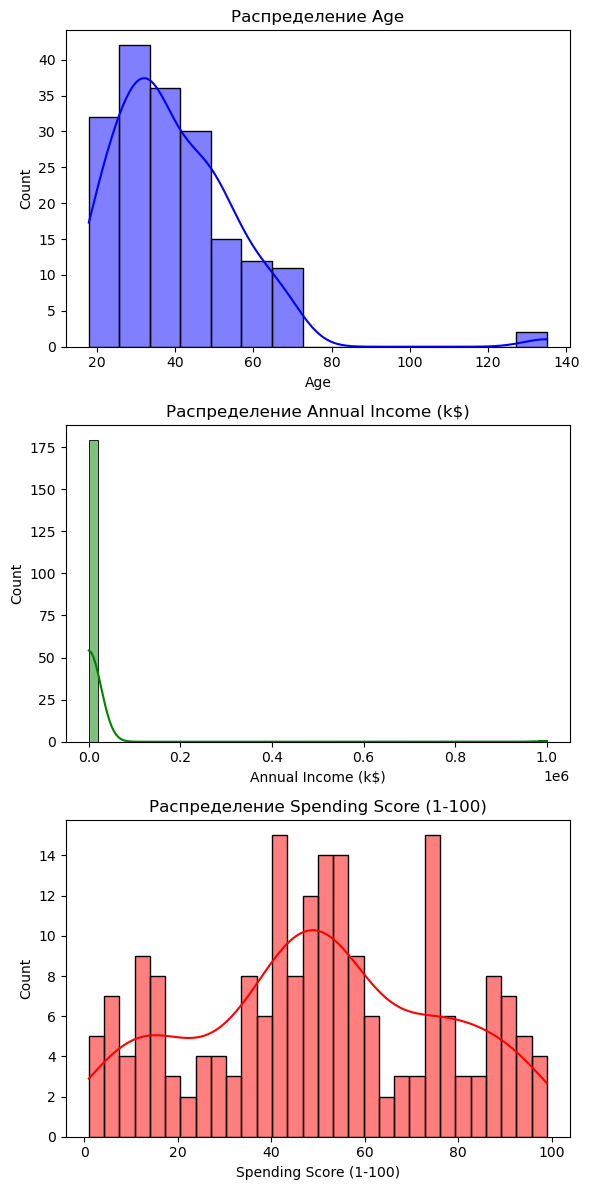

In [78]:
plt.figure(figsize=(6, 12))

plt.subplot(3, 1, 1)  # 3 строки, 1 столбец, 1-й график
sns.histplot(df['Age'], bins=15, kde=True, color='blue')
plt.title('Распределение Age')

plt.subplot(3, 1, 2)  # 3 строки, 1 столбец, 2-й график
sns.histplot(df['Annual Income (k$)'], bins=50, kde=True, color='green')
plt.title('Распределение Annual Income (k$)')

plt.subplot(3, 1, 3)  # 3 строки, 1 столбец, 3-й график
sns.histplot(df['Spending Score (1-100)'], bins=30, kde=True, color='red')
plt.title('Распределение Spending Score (1-100)')

plt.tight_layout()  # Чтобы графики не накладывались друг на друга
plt.show()


Text(0.5, 1.0, 'Распределение Genre')

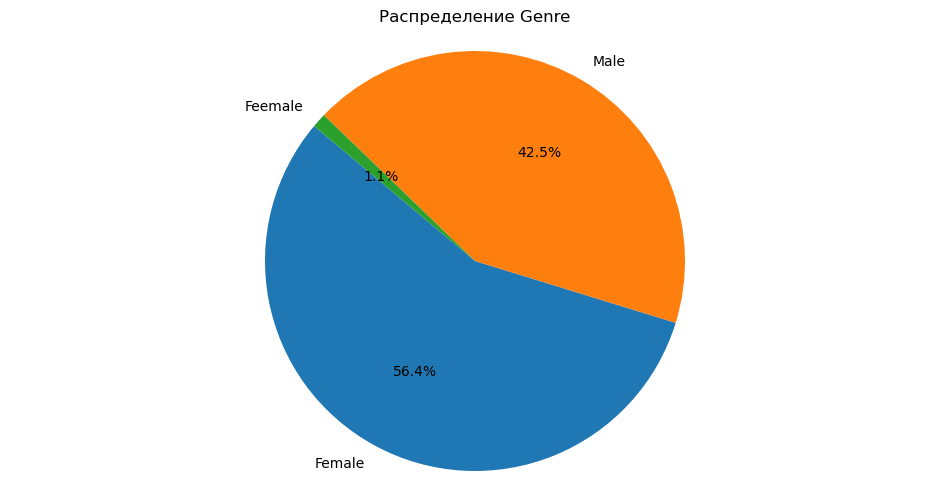

In [79]:
plt.figure(figsize=(12, 6))

genre_counts = df['Genre'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Распределение Genre')


Text(0.5, 1.0, 'Распределение Genre')

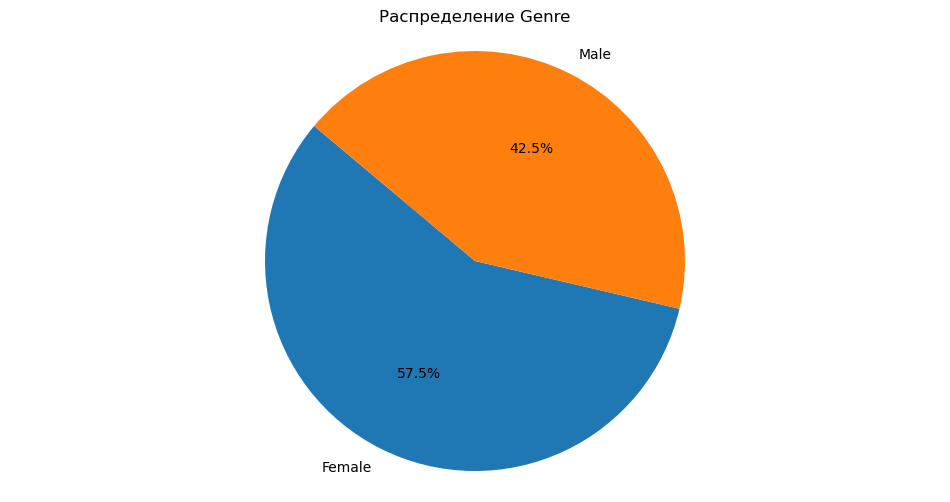

In [80]:
# Исправим опечатку с "Feemale"
df['Genre'] = df['Genre'].replace('Feemale', 'Female')

plt.figure(figsize=(12, 6))

genre_counts = df['Genre'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Распределение Genre')


### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [81]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)

print(f'Размер обучающей выборки: {train_df.shape}')
print(f'Размер тестовой выборки: {test_df.shape}')


Размер обучающей выборки: (160, 4)
Размер тестовой выборки: (40, 4)


### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [82]:
# Заменим пропуски в признаки пола

# Закодируем пол с помощью LabelEncoder
encoder = LabelEncoder()
train_df['Genre_encoded'] = encoder.fit_transform(train_df['Genre'].astype(str))  # Закодируем с пропусками

# Применим KNN для заполнения пропусков (3 ближайших соседей)
imputer = KNNImputer(n_neighbors=3)  
train_df[['Genre_encoded']] = imputer.fit_transform(train_df[['Genre_encoded']])

# Восстановим исходные категории
train_df['Genre'] = encoder.inverse_transform(train_df['Genre_encoded'].astype(int))
train_df.drop('Genre_encoded', axis=1, inplace=True)

print("Процент пропусков по признакам:")
print(f'{train_df.isnull().sum() / train_df.shape[0] * 100}')


Процент пропусков по признакам:
Genre                      0.000
Age                        9.375
Annual Income (k$)        11.250
Spending Score (1-100)     0.000
dtype: float64


In [83]:
# Заполним пропуски в числовых полях медианами
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Annual Income (k$)'] = train_df['Annual Income (k$)'].fillna(train_df['Annual Income (k$)'].median())

print("Процент пропусков по признакам:")
print(f'{train_df.isnull().sum() / train_df.shape[0] * 100}')


Процент пропусков по признакам:
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [84]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

train_df = remove_outliers_iqr(train_df, 'Age')
train_df = remove_outliers_iqr(train_df, 'Annual Income (k$)')

train_df.describe().T.style.background_gradient(cmap='YlOrRd')


,count,mean,std,min,25%,50%,75%,max
Age,153.000000,38.437908,13.216233,18.000000,29.000000,37.000000,48.000000,70.000000
Annual Income (k$),153.000000,58.934641,21.123906,15.000000,47.000000,62.000000,73.000000,103.000000
Spending Score (1-100),153.000000,51.915033,25.445749,1.000000,39.000000,51.000000,73.000000,98.000000


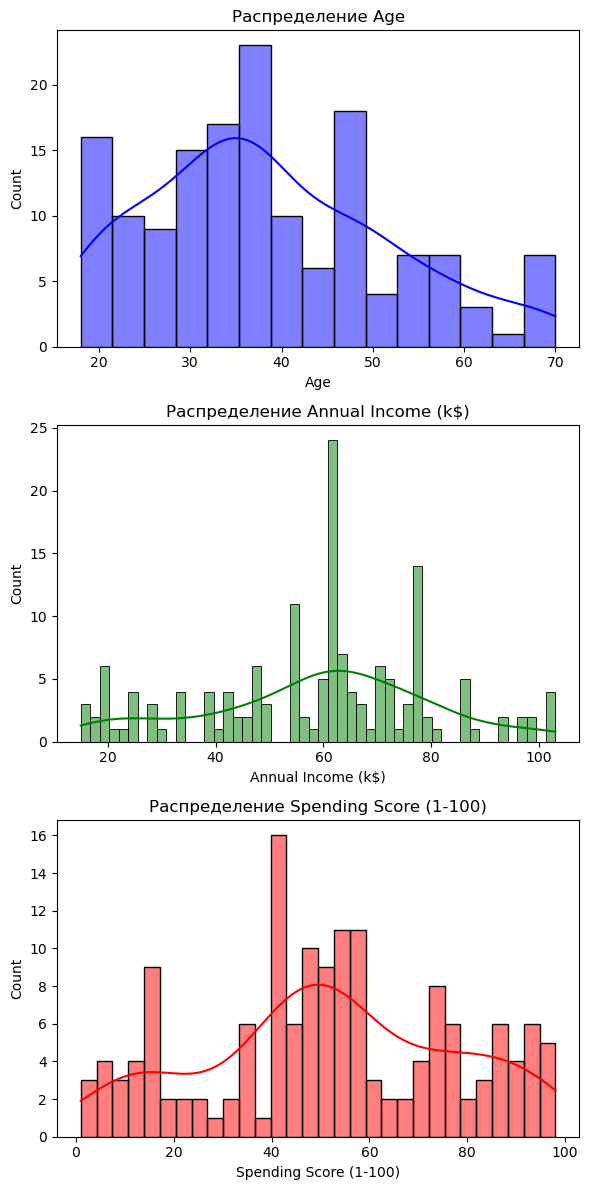

In [85]:
plt.figure(figsize=(6, 12))

plt.subplot(3, 1, 1)  # 3 строки, 1 столбец, 1-й график
sns.histplot(train_df['Age'], bins=15, kde=True, color='blue')
plt.title('Распределение Age')

plt.subplot(3, 1, 2)  # 3 строки, 1 столбец, 2-й график
sns.histplot(train_df['Annual Income (k$)'], bins=50, kde=True, color='green')
plt.title('Распределение Annual Income (k$)')

plt.subplot(3, 1, 3)  # 3 строки, 1 столбец, 3-й график
sns.histplot(train_df['Spending Score (1-100)'], bins=30, kde=True, color='red')
plt.title('Распределение Spending Score (1-100)')

plt.tight_layout()  # Чтобы графики не накладывались друг на друга
plt.show()


### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [86]:
# Стандартизация поля 'Spending Score (1-100)' с помощью StandardScaler, т.к. распределние похоже на нормальное
scaler_standard = StandardScaler()
train_df['Spending Score (1-100)'] = scaler_standard.fit_transform(train_df[['Spending Score (1-100)']])

# Стандартизация полей 'Age' и 'Annual Income (k$)' с помощью MinMaxScaler
scaler_minmax = MinMaxScaler()
train_df[['Age', 'Annual Income (k$)']] = scaler_minmax.fit_transform(train_df[['Age', 'Annual Income (k$)']])

train_df


,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
109,Male,0.961538,0.545455,-0.351505
108,Male,0.692308,0.545455,-0.233220
190,Female,0.346154,1.000000,1.304486
15,Male,0.365385,0.056818,-1.534356
57,nan,0.634615,0.329545,-0.075507
...,...,...,...,...
134,Female,0.250000,0.647727,0.752489
138,Male,0.269231,0.659091,0.831346
73,Female,0.807692,0.397727,-0.114935


### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [87]:
train_df = pd.get_dummies(train_df, columns=['Genre'], drop_first=True)

train_df


,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,Genre_nan
CustomerID,,,,,
109,0.961538,0.545455,-0.351505,True,False
108,0.692308,0.545455,-0.233220,True,False
190,0.346154,1.000000,1.304486,False,False
15,0.365385,0.056818,-1.534356,True,False
57,0.634615,0.329545,-0.075507,False,True
...,...,...,...,...,...
134,0.250000,0.647727,0.752489,False,False
138,0.269231,0.659091,0.831346,True,False
73,0.807692,0.397727,-0.114935,False,False


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [88]:
# Заменим пропуски в признаки пола

# Закодируем пол с помощью LabelEncoder
encoder = LabelEncoder()
test_df['Genre_encoded'] = encoder.fit_transform(test_df['Genre'].astype(str))  # Закодируем с пропусками

# Применим KNN для заполнения пропусков (3 ближайших соседей)
imputer = KNNImputer(n_neighbors=3)  
test_df[['Genre_encoded']] = imputer.fit_transform(test_df[['Genre_encoded']])

# Восстановим исходные категории
test_df['Genre'] = encoder.inverse_transform(test_df['Genre_encoded'].astype(int))
test_df.drop('Genre_encoded', axis=1, inplace=True)

print("Процент пропусков по признакам:")
print(f'{test_df.isnull().sum() / test_df.shape[0] * 100}')



Процент пропусков по признакам:
Genre                      0.0
Age                       12.5
Annual Income (k$)         5.0
Spending Score (1-100)     0.0
dtype: float64


In [89]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

test_df = remove_outliers_iqr(test_df, 'Age')
test_df = remove_outliers_iqr(test_df, 'Annual Income (k$)')

test_df.describe().T.style.background_gradient(cmap='YlOrRd')


,count,mean,std,min,25%,50%,75%,max
Age,33.000000,40.909091,12.877703,23.000000,31.000000,36.000000,51.000000,67.000000
Annual Income (k$),33.000000,60.151515,27.953221,17.000000,39.000000,60.000000,87.000000,120.000000
Spending Score (1-100),33.000000,45.848485,23.963672,7.000000,29.000000,46.000000,59.000000,99.000000


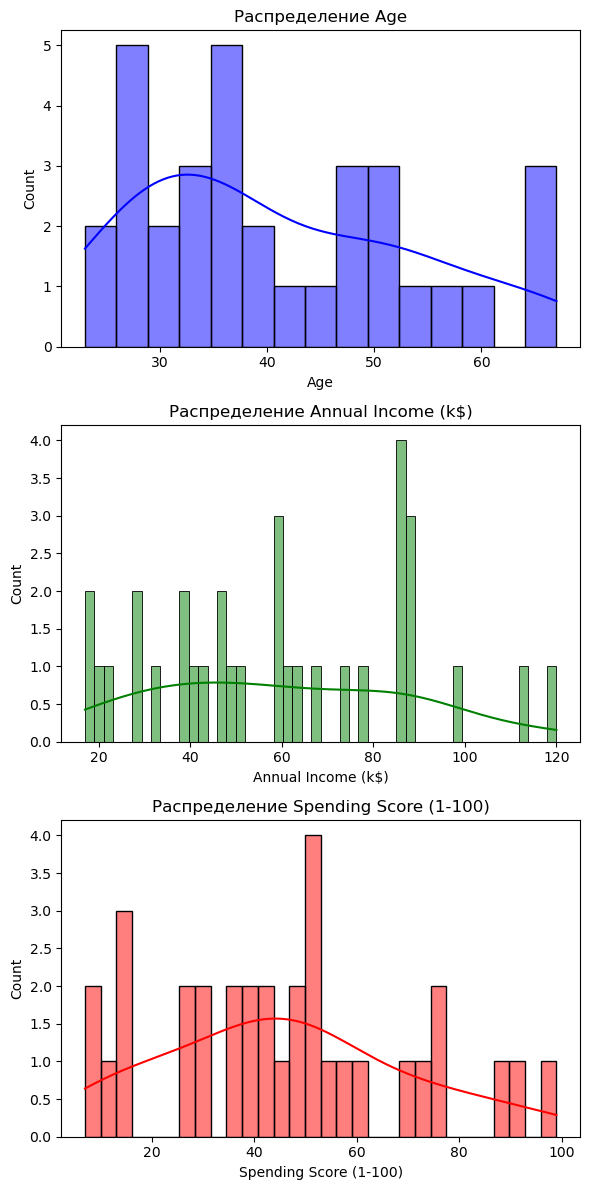

In [90]:
plt.figure(figsize=(6, 12))

plt.subplot(3, 1, 1)  # 3 строки, 1 столбец, 1-й график
sns.histplot(test_df['Age'], bins=15, kde=True, color='blue')
plt.title('Распределение Age')

plt.subplot(3, 1, 2)  # 3 строки, 1 столбец, 2-й график
sns.histplot(test_df['Annual Income (k$)'], bins=50, kde=True, color='green')
plt.title('Распределение Annual Income (k$)')

plt.subplot(3, 1, 3)  # 3 строки, 1 столбец, 3-й график
sns.histplot(test_df['Spending Score (1-100)'], bins=30, kde=True, color='red')
plt.title('Распределение Spending Score (1-100)')

plt.tight_layout()  # Чтобы графики не накладывались друг на друга
plt.show()


In [91]:
# Стандартизация поля 'Spending Score (1-100)' с помощью StandardScaler, т.к. распределние похоже на нормальное
scaler_standard = StandardScaler()
test_df['Spending Score (1-100)'] = scaler_standard.fit_transform(test_df[['Spending Score (1-100)']])

# Стандартизация полей 'Age' и 'Annual Income (k$)' с помощью MinMaxScaler
scaler_minmax = MinMaxScaler()
test_df[['Age', 'Annual Income (k$)']] = scaler_minmax.fit_transform(test_df[['Age', 'Annual Income (k$)']])

test_df.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
59,Female,0.090909,0.281553,0.218305
41,Female,0.954545,0.203883,-0.459725
35,Female,0.590909,0.155340,-1.349638
103,Male,1.000000,0.436893,0.557320
185,Female,0.409091,0.796117,-0.290217


In [92]:
test_df = pd.get_dummies(test_df, columns=['Genre'], drop_first=True)

test_df.head()


,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,Genre_nan
CustomerID,,,,,
59,0.090909,0.281553,0.218305,False,False
41,0.954545,0.203883,-0.459725,False,False
35,0.590909,0.155340,-1.349638,False,False
103,1.000000,0.436893,0.557320,True,False
185,0.409091,0.796117,-0.290217,False,False
